In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# importing the necessary libraryies

### Read Data

In [2]:
import pandas as pd
df = pd.read_csv('shoe_sales.csv')
df.head()

,date,brand,sold_qty
0,9/1/2023,Nike,24.0
1,9/1/2023,Adidas,14.0
2,9/2/2023,Nike,21.0
3,9/2/2023,Adidas,12.0
4,9/3/2023,Nike,18.0


In [3]:
df.describe()

,sold_qty
count,58.000000
mean,27.482759
std,88.519844
min,7.000000
25%,12.250000
50%,16.000000
75%,19.750000
max,689.000000


In [5]:
df.shape

(60, 3)

In [8]:
# 25% (percentile) 25% rows has sold quantity less then 12.25 

In [13]:
df[df.sold_qty < 12.25].shape
# means there are 15 rows who have less then 12.25 sold_qty

(15, 3)

In [14]:
15/60

0.25

# Nike Analysis

In [16]:
df_nike = df[df["brand"] == "Nike"]
df_nike.shape

# half of the rows are of nike

(30, 3)

In [17]:
df_nike.describe()

,sold_qty
count,28.000000
mean,19.642857
std,3.117624
min,14.000000
25%,17.000000
50%,19.500000
75%,22.000000
max,25.000000


In [26]:
val = round(df_nike["sold_qty"].median())
val

# in 1 day we are selling 20 nike shoes

# df_nike.sold_qty.median()

20

In [24]:
# Now we are checking that is there any null value in the data set 
# id there is True == yes or False == No

df_nike.isnull()

,date,brand,sold_qty
0,False,False,False
2,False,False,False
4,False,False,False
6,False,False,False
8,False,False,False
10,False,False,False
12,False,False,False
14,False,False,False
16,False,False,False
18,False,False,False


In [25]:
# Eliminating those rows

df_nike[df_nike.sold_qty.isnull()]

,date,brand,sold_qty
32,9/17/2023,Nike,NaN
48,9/25/2023,Nike,NaN


In [30]:
df_nike.fillna({"sold_qty": val}, inplace=True)
# df_nike.sold_qty.fillna(val, inplace=True)

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_25010/3668840746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nike.fillna({"sold_qty": val}, inplace=True)


In [32]:
df_nike.loc[[32,48]]
# know they are filled

,date,brand,sold_qty
32,9/17/2023,Nike,20.0
48,9/25/2023,Nike,20.0


# Adidas Analysis

In [33]:
df_adidas = df[df.brand == "Adidas"]
df_adidas.shape

(30, 3)

In [34]:
df_adidas.head()

,date,brand,sold_qty
1,9/1/2023,Adidas,14.0
3,9/2/2023,Adidas,12.0
5,9/3/2023,Adidas,11.0
7,9/4/2023,Adidas,13.0
9,9/5/2023,Adidas,10.0


In [35]:
df_adidas.describe()

,sold_qty
count,30.000000
mean,34.800000
std,123.602366
min,7.000000
25%,10.000000
50%,12.500000
75%,15.000000
max,689.000000


In [22]:
def plot_qty():
    plt.figure(figsize=(15, 6))
    
    dates = df_nike['date']
    
    plt.plot(dates, df_nike['sold_qty'], marker='o', label='Nike', color='blue')
    plt.plot(dates, df_adidas['sold_qty'], marker='o', label='Adidas', color='red')
    
    plt.xlabel('Date')
    plt.ylabel('Total Qty Sold')
    plt.title('Daily Sales Qty for Nike and Adidas in September 2023')
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.show()

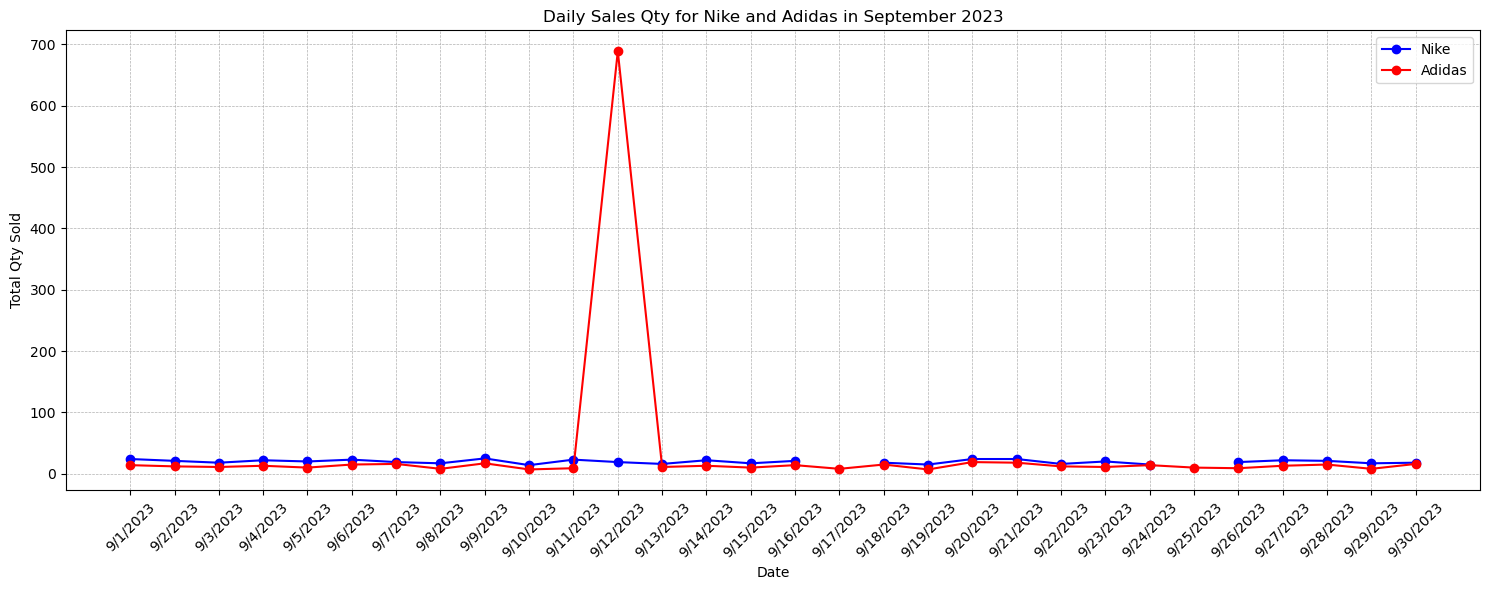

In [25]:
from matplotlib import pyplot as plt

df_adidas = df[df.brand == "Adidas"]
df_nike = df[df["brand"] == "Nike"]

plot_qty()

In [45]:
df_adidas["sold_qty"].describe()

count     30.000000
mean      34.800000
std      123.602366
min        7.000000
25%       10.000000
50%       12.500000
75%       15.000000
max      689.000000
Name: sold_qty, dtype: float64

In [43]:
df_adidas[df.sold_qty > 15]

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_25010/1165065179.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_adidas[df.sold_qty > 15]


,date,brand,sold_qty
13,9/7/2023,Adidas,16.0
17,9/9/2023,Adidas,17.0
23,9/12/2023,Adidas,689.0
39,9/20/2023,Adidas,19.0
41,9/21/2023,Adidas,18.0
59,9/30/2023,Adidas,16.0


In [48]:
# value  for replacing the outlier(689)

val = round(df_adidas.sold_qty.median())
val

12

In [17]:
import pandas as pd
df = pd.read_csv('shoe_sales.csv')
df_adidas = df[df.brand == "Adidas"]

val = round(df_adidas.sold_qty.median())
df_adidas.sold_qty.replace(689, val, inplace=True)

/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_32010/919523690.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_adidas.sold_qty.replace(689, val, inplace=True)
/var/folders/g6/tsh89k751tn8lxp3pdk7rjjw0000gn/T/ipykernel_32010/919523690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_adidas.sold_qty.replace(689, val, inp

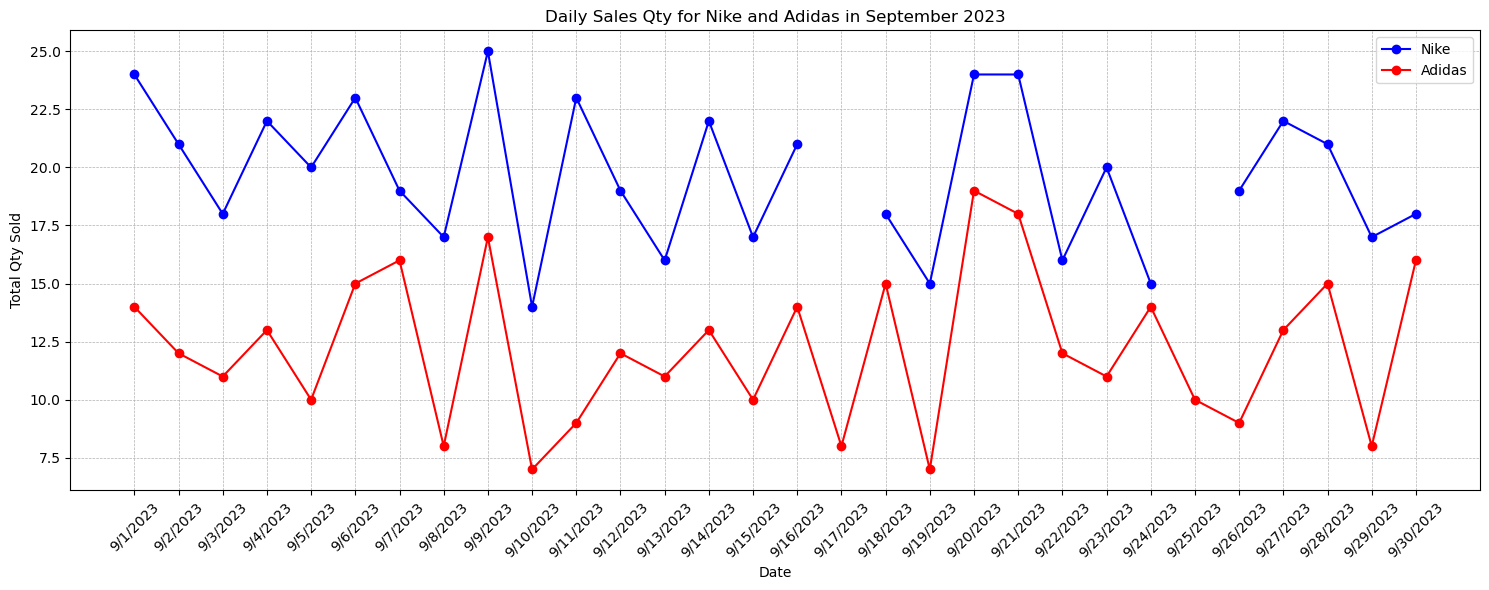

In [18]:
plot_qty()